# Previsão de Demanda em Varejo com Machine Learning

Este projeto demonstra como prever a demanda de produtos em ambientes de varejo utilizando aprendizado de máquina. Aplicamos um pipeline completo — da análise exploratória à avaliação de modelos — com dados realistas, mas acessíveis, extraídos do Kaggle.

## Índice

1. [Introdução](#1)  
  1.1 [Sobre os Dados](#1.1)  
  1.2 [Importação das Bibliotecas](#1.2)  

2. [Análise Exploratória de Dados (EDA)](#2)  
  2.1 [Carregamento dos Dados](#2.1)  
  2.2 [Análise Geral](#2.2)  
  2.3 [Visualizações e Padrões](#2.3)  
  2.4 [Correlação entre Variáveis Numéricas](#2.4)  

3. [Pré-processamento dos Dados](#3)  
  3.1 [Conversão de Datas e Extração de Atributos Temporais](#3.1)  
  3.2 [Codificação de Variáveis Categóricas](#3.2)  

4. [Modelagem Preditiva (Regressão)](#4)  
  4.1 [Modelos Escolhidos](#4.1)  

5. [Avaliação de Performance](#5)  
  5.1 [Resultados](#5.1)   

6. [Conclusão Estratégica](#6)


<a name="1"></a>
## 1. Introdução
 
A previsão de demanda é um desafio estratégico recorrente em operações logísticas e de varejo. Tomar decisões assertivas sobre quanto estocar, quando repor e como distribuir produtos impacta diretamente na eficiência operacional, nos custos logísticos e na satisfação do cliente.
 
Neste projeto, será desenvolvido um modelo de aprendizado de máquina para prever a demanda de produtos em lojas de varejo, utilizando técnicas de regressão supervisionada. A proposta é construir um pipeline completo, desde a análise exploratória até a avaliação do modelo, com base em um conjunto de dados que simula operações reais de estoque, vendas e promoções no setor varejista.
 
O foco está em aplicar os conhecimentos adquiridos ao longo do curso em um problema prático, com uso das bibliotecas `pandas`, `numpy`, `matplotlib`, `seaborn` e `scikit-learn`, no ambiente Python com Jupyter Notebook.
 
Este projeto integra tanto uma atividade acadêmica quanto um estudo de caso voltado para portfólio profissional.

<a name="2"></a>
### 1.1 Sobre os Dados
     
Os dados utilizados neste projeto foram extraídos da plataforma Kaggle, por meio do conjunto **Retail Store Inventory and Demand Forecasting**. Trata-se de um dataset sintético que simula cenários reais de gerenciamento de estoque e previsão de demanda em operações de varejo.
     
O conjunto de dados contém aproximadamente 76 mil registros e inclui variáveis relacionadas a:
     
- Identificação da loja e do produto;
- Preço, desconto, promoções e concorrência;
- Estoque atual e histórico de vendas;
- Data, dia da semana, feriados e sazonalidade;
- Condições climáticas.
    
A variável alvo (target) do projeto é a **`Demand`**, que representa a quantidade prevista de unidades que será demandada para um determinado produto em uma loja específica, em determinada data.
    
**Descrição das colunas do dataset:**

| Coluna                | Descrição                                                                 |
|-----------------------|---------------------------------------------------------------------------|
| `Date`                | Data da observação                                                        |
| `Store ID`            | Identificador único da loja                                               |
| `Product ID`          | Identificador único do produto                                            |
| `Category`            | Categoria do produto (ex: bebidas, higiene, alimentos)                    |
| `Region`              | Região geográfica da loja                                                 |
| `Inventory Level`     | Quantidade atual disponível em estoque                                    |
| `Units Sold`          | Unidades vendidas na data registrada                                      |
| `Units Ordered`       | Unidades solicitadas para reposição                                       |
| `Price`               | Preço atual de venda do produto                                           |
| `Discount`            | Percentual ou valor de desconto aplicado ao produto                       |
| `Weather Condition`   | Condição climática no dia (ex: Ensolarado, Chuvoso, Nublado)              |
| `Promotion`           | Indica se o produto estava em promoção (1 = sim, 0 = não)                 |
| `Competitor Pricing`  | Preço praticado pela concorrência para o mesmo produto                    |
| `Seasonality`         | Estação do ano ou período de sazonalidade (ex: Natal, Verão, etc.)        |
| `Epidemic`            | Indicador binário se havia alguma epidemia no período (1 = sim, 0 = não)  |
| `Demand`              | Variável alvo: quantidade de unidades previstas para demanda              |
    
    
Este dataset é ideal para tarefas de regressão, pois oferece um cenário próximo do mundo real, porém com volume acessível para processamento em máquinas locais ou notebooks online.
    
🔗 **Fonte dos dados:**
[Retail Store Inventory and Demand Forecasting – Kaggle](https://www.kaggle.com/datasets/atomicd/retail-store-inventory-and-demand-forecasting)
    
**Formato:** Arquivo CSV (`sales_data.csv`, ou similar)
    


<a name="1.2"></a>
### 1.2 Importação das Bibliotecas

Nesta etapa, importamos as bibliotecas essenciais que serão utilizadas ao longo do projeto. Essas bibliotecas permitem a manipulação e análise de dados, criação de visualizações gráficas, além da construção e avaliação dos modelos de machine learning.

- **pandas** e **numpy**: manipulação e análise de dados;
- **matplotlib** e **seaborn**: visualizações estatísticas e gráficas;
- **scikit-learn**: modelos preditivos, métricas e pré-processamento;
- **warnings**: para ocultar mensagens de alerta durante a execução.


In [10]:
# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo visual dos gráficos
sns.set_theme(style="whitegrid")
# plt.rcParams['figure.figsize'] = (10, 4)

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Configurações adicionais
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)

print("Bibliotecas importadas com sucesso.")

Bibliotecas importadas com sucesso.


In [11]:
# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo visual dos gráficos
sns.set_theme(style="whitegrid")
# plt.rcParams['figure.figsize'] = (10, 4)

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Configurações adicionais
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)

print("Bibliotecas importadas com sucesso.")


Bibliotecas importadas com sucesso.


<a name="2"></a>
## 2. Análise Exploratória de Dados (EDA)

A análise exploratória de dados (Exploratory Data Analysis — EDA) é uma etapa fundamental para compreender a estrutura e os padrões do conjunto de dados. É nesta fase que observamos distribuições, relações entre variáveis, presença de outliers, valores ausentes, e começamos a formular hipóteses sobre quais fatores mais influenciam a demanda.

Nosso objetivo nesta etapa é entender o comportamento da variável alvo (`Demand`) e identificar as variáveis preditoras mais relevantes para a modelagem.


<a name="2.1"></a>
### 2.1 Carregamento dos Dados

Vamos carregar o conjunto de dados principal, localizado na pasta `data/`, e visualizar suas primeiras entradas.

In [12]:
# Carregando o dataset
df = pd.read_csv('data/sales_data.csv')

# Exibindo as dimensões e as 5 primeiras linhas
print(f"Formato do dataset: {df.shape}")
df.head()

Formato do dataset: (76000, 16)


,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Price,Discount,Weather Condition,Promotion,Competitor Pricing,Seasonality,Epidemic,Demand
0,2022-01-01,S001,P0001,Electronics,North,195,102,252,72.72,5,Snowy,0,85.73,Winter,0,115
1,2022-01-01,S001,P0002,Clothing,North,117,117,249,80.16,15,Snowy,1,92.02,Winter,0,229
2,2022-01-01,S001,P0003,Clothing,North,247,114,612,62.94,10,Snowy,1,60.08,Winter,0,157
3,2022-01-01,S001,P0004,Electronics,North,139,45,102,87.63,10,Snowy,0,85.19,Winter,0,52
4,2022-01-01,S001,P0005,Groceries,North,152,65,271,54.41,0,Snowy,0,51.63,Winter,0,59


<a name="2.2"></a>
### 2.2 Análise Geral

Nesta etapa, analisamos a estrutura geral do dataset: tipos de variáveis, presença de valores nulos, estatísticas descritivas e possíveis inconsistências. Esse diagnóstico inicial é fundamental para orientar as etapas de pré-processamento e modelagem.


In [13]:
# Estrutura do dataset
print("Informações gerais:")
df.info()

Informações gerais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76000 entries, 0 to 75999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                76000 non-null  object 
 1   Store ID            76000 non-null  object 
 2   Product ID          76000 non-null  object 
 3   Category            76000 non-null  object 
 4   Region              76000 non-null  object 
 5   Inventory Level     76000 non-null  int64  
 6   Units Sold          76000 non-null  int64  
 7   Units Ordered       76000 non-null  int64  
 8   Price               76000 non-null  float64
 9   Discount            76000 non-null  int64  
 10  Weather Condition   76000 non-null  object 
 11  Promotion           76000 non-null  int64  
 12  Competitor Pricing  76000 non-null  float64
 13  Seasonality         76000 non-null  object 
 14  Epidemic            76000 non-null  int64  
 15  Demand              76000 non-nul

In [14]:
# Verificando valores nulos
print("Valores ausentes por coluna:")
print(df.isnull().sum())

Valores ausentes por coluna:
Date                  0
Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Price                 0
Discount              0
Weather Condition     0
Promotion             0
Competitor Pricing    0
Seasonality           0
Epidemic              0
Demand                0
dtype: int64


In [15]:
# Estatísticas descritivas das variáveis numéricas
print(" Estatísticas descritivas:")
df.describe().T

 Estatísticas descritivas:


,count,mean,std,min,25%,50%,75%,max
Inventory Level,76000.0,301.062842,226.510161,0.00,136.0000,227.0,408.0000,2267.00
Units Sold,76000.0,88.827316,43.994525,0.00,58.0000,84.0,114.0000,426.00
Units Ordered,76000.0,89.090645,162.404627,0.00,0.0000,0.0,121.0000,1616.00
Price,76000.0,67.726028,39.377899,4.74,31.9975,64.5,95.8300,228.03
Discount,76000.0,9.087039,7.475781,0.00,5.0000,10.0,10.0000,25.00
Promotion,76000.0,0.328947,0.469834,0.00,0.0000,0.0,1.0000,1.00
Competitor Pricing,76000.0,69.454029,40.943818,4.29,32.6200,65.7,97.9325,261.22
Epidemic,76000.0,0.200000,0.400003,0.00,0.0000,0.0,0.0000,1.00
Demand,76000.0,104.317158,46.964801,4.00,71.0000,100.0,133.0000,430.00


<a name="2.3"></a>
### 2.3 Visualizações e Padrões

Nesta etapa, exploramos visualmente a distribuição da variável alvo (`Demand`) e sua relação com outras variáveis preditoras, como preço, estoque, promoção e sazonalidade. As visualizações nos ajudam a detectar padrões, assimetrias, valores extremos (outliers) e correlações visuais que serão úteis para orientar a modelagem futura.


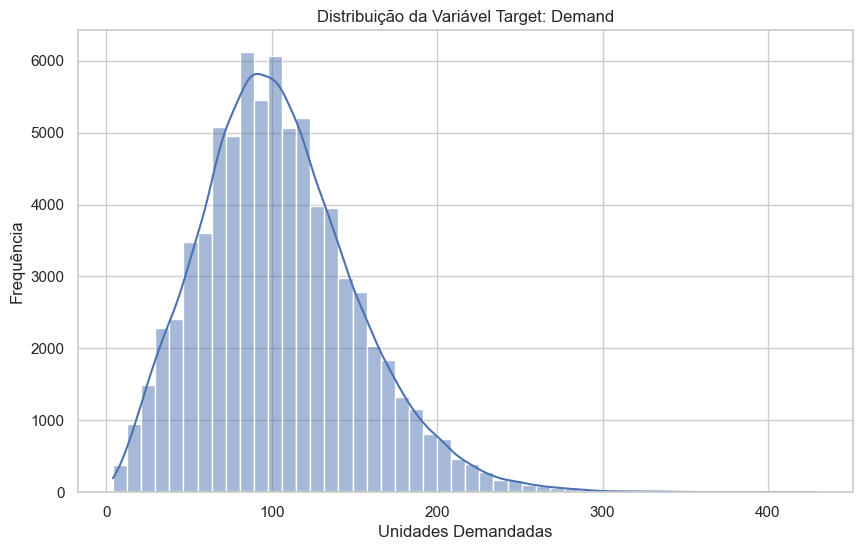

In [16]:
# Distribuição da variável alvo
plt.figure(figsize=(10, 6))
sns.histplot(df['Demand'], bins=50, kde=True)
plt.title('Distribuição da Variável Target: Demand')
plt.xlabel('Unidades Demandadas')
plt.ylabel('Frequência')
plt.show()


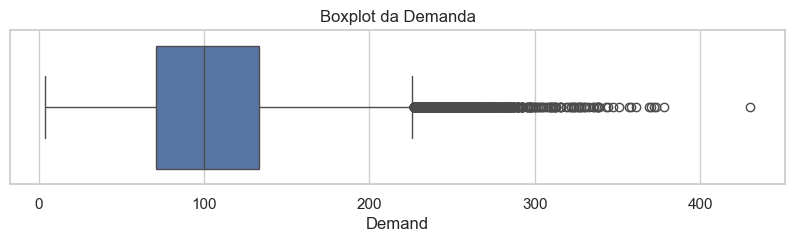

In [17]:
# Boxplot
plt.figure(figsize=(10, 2))
sns.boxplot(x=df['Demand'])
plt.title('Boxplot da Demanda')
plt.show()

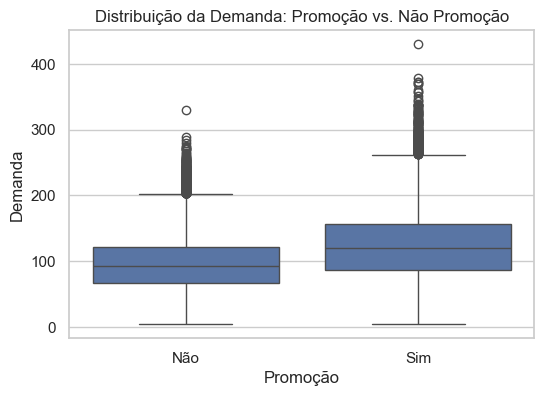

In [18]:
# Demanda por Promoção
plt.figure(figsize=(6, 4))
sns.boxplot(x='Promotion', y='Demand', data=df)
plt.title('Distribuição da Demanda: Promoção vs. Não Promoção')
plt.xlabel('Promoção')
plt.ylabel('Demanda')
plt.xticks([0, 1], ['Não', 'Sim'])
plt.show()

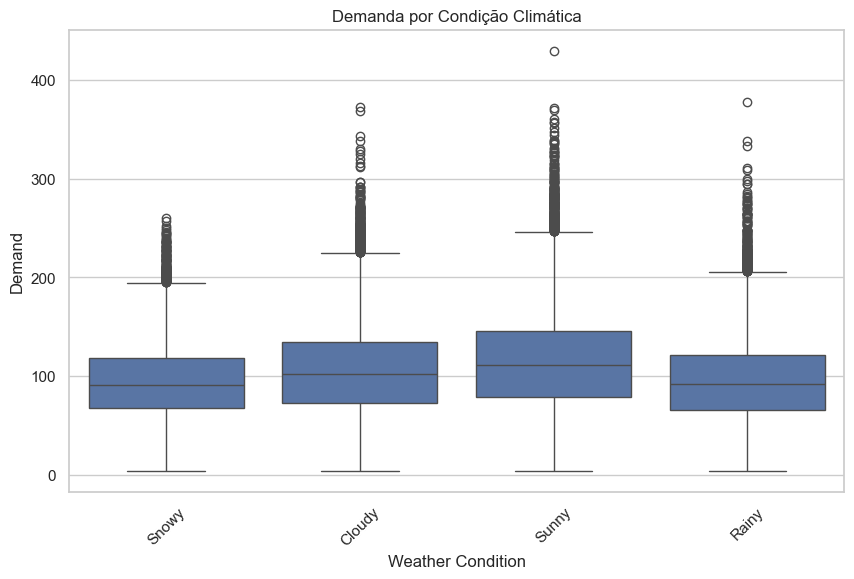

In [19]:
# Demanda por Condição Climática
plt.figure(figsize=(10, 6))
sns.boxplot(x='Weather Condition', y='Demand', data=df)
plt.title('Demanda por Condição Climática')
plt.xticks(rotation=45)
plt.show()

**Distribuição da variável alvo (`Demand`)**: A variável apresenta uma distribuição assimétrica à direita (positiva), com a maior parte das demandas entre 50 e 150 unidades. Há presença de outliers acima de 300.

**Promoção vs. Demanda**: A mediana da demanda é visivelmente maior quando há promoção ativa, indicando que este é um fator relevante na decisão de compra.

**Condições climáticas**: A demanda parece variar ligeiramente entre diferentes condições climáticas. Dias ensolarados e nublados apresentam demandas ligeiramente maiores em média, mas o efeito visual não é muito acentuado.

<a name="2.4"></a>
### 2.4 Correlação entre Variáveis Numéricas

A matriz de correlação nos permite observar como as variáveis numéricas se relacionam entre si. Em especial, nos interessa entender quais atributos têm maior correlação com a variável alvo `Demand`.

Correlação positiva indica que o aumento de uma variável tende a aumentar a outra. Correlação negativa indica o contrário. Correlações próximas de zero indicam pouca ou nenhuma relação linear.


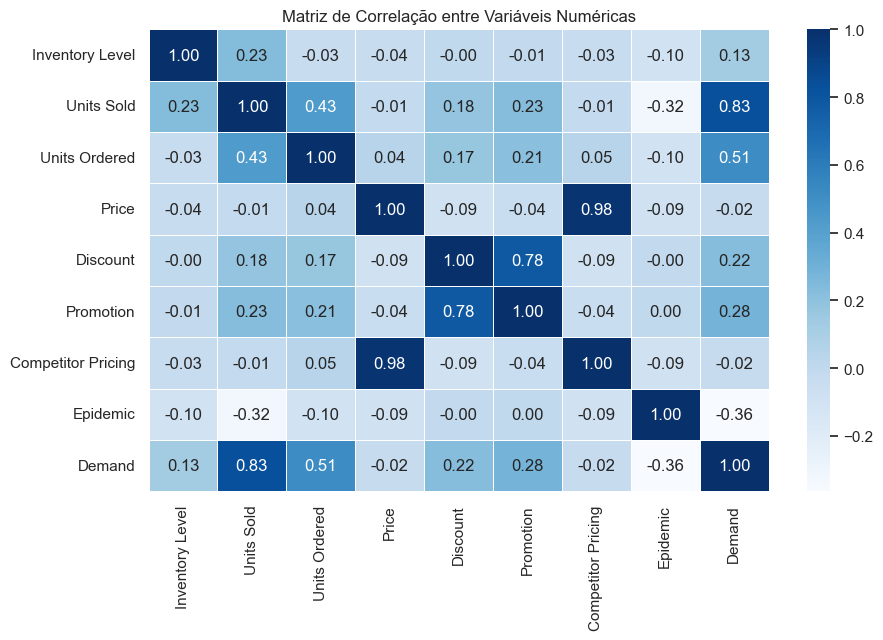

In [20]:
# Selecionando apenas as variáveis numéricas
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Calculando a correlação
corr = numeric_df.corr()

# Visualizando o heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='Blues', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.show()


**Matriz de correlação**:
  - `Units Sold` tem **forte correlação positiva com `Demand`** (0.83);
  - `Units Ordered` também apresenta correlação moderada (0.51);
  - Promoções, descontos e clima possuem correlação leve, mas ainda potencialmente úteis.
  - `Epidemic` apresenta uma correlação negativa com a demanda (-0.36), o que pode refletir queda no consumo durante períodos críticos.

Essas observações guiarão as próximas etapas de engenharia de atributos e modelagem.


<a name="3"></a>
## 3. Pré-processamento dos Dados

Nesta etapa, preparamos os dados para alimentar os algoritmos de machine learning. Modelos de regressão exigem que os dados estejam limpos, estruturados e em formatos numéricos.

As principais decisões que tomaremos a seguir envolvem:

-  Conversão e extração de informações da coluna `Date`;
-  Codificação de variáveis categóricas (como `Region`, `Weather Condition`, `Category`);
-  Escalonamento ou padronização de variáveis numéricas (principalmente para lidar com outliers).

Embora o dataset não possua valores nulos, a variável alvo `Demand` apresenta outliers visíveis acima de 300 unidades. Como esses valores representam possíveis picos reais de demanda (ex: promoções, sazonalidade), optamos por **manter os dados brutos**, sem remoção direta de outliers.

Entretanto, vamos considerar o uso de **transformação logarítmica** durante a modelagem para reduzir o impacto dessas extremidades nos algoritmos sensíveis à variação, como a regressão linear.

<a name="3.1"></a>
### 3.1 Conversão de Datas e Extração de Atributos Temporais

A coluna `Date` representa um fator temporal importante na previsão de demanda. Para que os modelos consigam aprender padrões sazonais e comportamentais ao longo do tempo, vamos converter essa coluna para o tipo datetime do Python e extrair variáveis temporais como:

- Ano (`Year`)
- Mês (`Month`)
- Dia (`Day`)
- Dia da semana (`Weekday`)
- Semana do ano (`Week`)
- Indicação de fim de semana (`Is_Weekend`)

Esses novos atributos ajudarão a capturar padrões de consumo que variam com o tempo, como aumento de vendas aos fins de semana ou sazonalidade em determinadas épocas do ano.


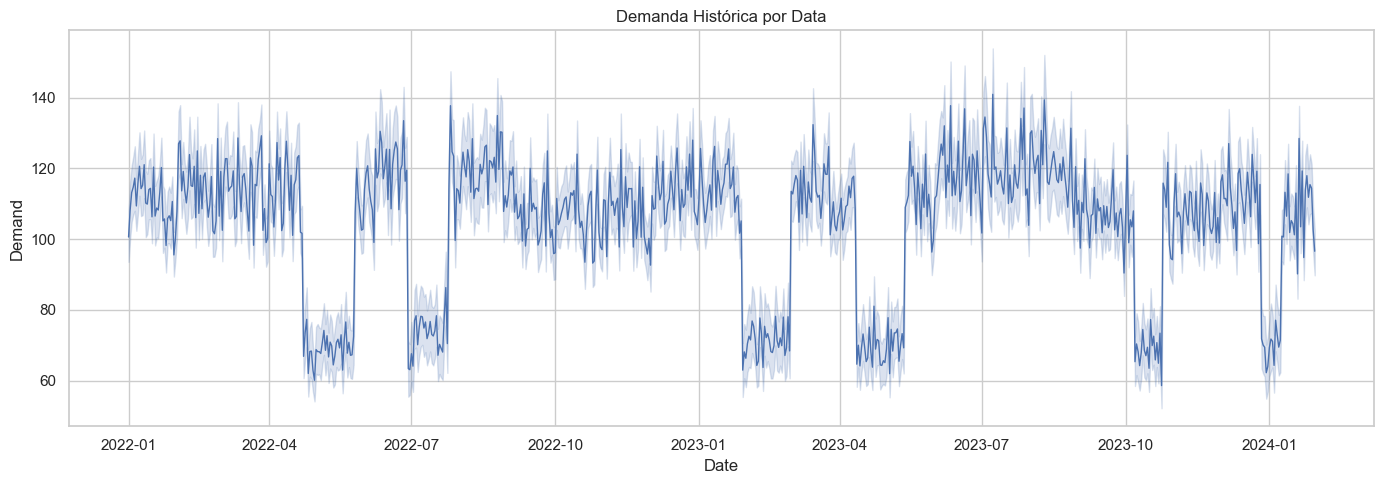

In [21]:
# Convertendo coluna de Data
df['Date'] = pd.to_datetime(df['Date'])

# Extraindo atributos temporais
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.weekday  # 0 = segunda, 6 = domingo
df['Week'] = df['Date'].dt.isocalendar().week
df['Is_Weekend'] = df['Weekday'].apply(lambda x: 1 if x >= 5 else 0)

# Visualização da demanda ao longo do tempo
plt.figure(figsize=(14, 5))
sns.lineplot(data=df, x='Date', y='Demand', linewidth=1)
plt.title('Demanda Histórica por Data')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.tight_layout()
plt.show()

<a name="3.2"></a>
### 3.2 Codificação de Variáveis Categóricas

Modelos de machine learning não conseguem lidar diretamente com variáveis do tipo string ou categóricas. Por isso, precisamos converter essas variáveis em valores numéricos.

As principais estratégias são:

- **Label Encoding**: converte cada categoria em um número único. É útil para variáveis ordinais ou quando o número de categorias é muito alto.
- **One-Hot Encoding**: cria uma coluna para cada categoria possível. É ideal para variáveis com poucas categorias e sem ordem natural.

Neste projeto, utilizaremos `pandas.get_dummies()` para aplicar One-Hot Encoding em variáveis categóricas com poucas classes, e `LabelEncoder` do `sklearn` para colunas com muitos valores únicos.


In [22]:
# Verificando colunas categóricas
categorical_cols = df.select_dtypes(include='object').columns.tolist()
print("Variáveis categóricas:", categorical_cols)


Variáveis categóricas: ['Store ID', 'Product ID', 'Category', 'Region', 'Weather Condition', 'Seasonality']


In [23]:
# One-Hot Encoding (dummies) para variáveis com poucas categorias
df = pd.get_dummies(df, columns=['Weather Condition', 'Category', 'Region', 'Seasonality'], drop_first=True)

# Label Encoding para colunas com muitos valores únicos
le_store = LabelEncoder()
le_product = LabelEncoder()

df['Store ID'] = le_store.fit_transform(df['Store ID'])
df['Product ID'] = le_product.fit_transform(df['Product ID'])

df.head()

,Date,Store ID,Product ID,Inventory Level,Units Sold,Units Ordered,Price,Discount,Promotion,Competitor Pricing,Epidemic,Demand,Year,Month,Day,Weekday,Week,Is_Weekend,Weather Condition_Rainy,Weather Condition_Snowy,Weather Condition_Sunny,Category_Electronics,Category_Furniture,Category_Groceries,Category_Toys,Region_North,Region_South,Region_West,Seasonality_Spring,Seasonality_Summer,Seasonality_Winter
0,2022-01-01,0,0,195,102,252,72.72,5,0,85.73,0,115,2022,1,1,5,52,1,False,True,False,True,False,False,False,True,False,False,False,False,True
1,2022-01-01,0,1,117,117,249,80.16,15,1,92.02,0,229,2022,1,1,5,52,1,False,True,False,False,False,False,False,True,False,False,False,False,True
2,2022-01-01,0,2,247,114,612,62.94,10,1,60.08,0,157,2022,1,1,5,52,1,False,True,False,False,False,False,False,True,False,False,False,False,True
3,2022-01-01,0,3,139,45,102,87.63,10,0,85.19,0,52,2022,1,1,5,52,1,False,True,False,True,False,False,False,True,False,False,False,False,True
4,2022-01-01,0,4,152,65,271,54.41,0,0,51.63,0,59,2022,1,1,5,52,1,False,True,False,False,False,True,False,True,False,False,False,False,True


<a name="4"></a>
## 4. Modelagem Preditiva (Regressão)

Com os dados tratados e prontos, agora podemos treinar modelos de regressão para prever a variável `Demand`.

Nesta etapa, faremos:
- A separação entre dados de treino e teste;
- O treinamento de modelos preditivos (Regressão Linear e Random Forest);
- A geração de previsões;
- A preparação para avaliação dos resultados.


In [24]:
# Aplicando log na variável alvo
y_log = np.log1p(df['Demand'])

# Separando variáveis preditoras e alvo
X = df.drop(['Demand', 'Date'], axis=1)
y = y_log

# Separação treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Treino:", X_train.shape)
print("Teste:", X_test.shape)


Treino: (60800, 29)
Teste: (15200, 29)


<a name="4.1"></a>
### 4.1 Modelos escolhidos

Utilizamos dois modelos distintos para fins comparativos:

- **Regressão Linear**: modelo simples e interpretável, que serve como baseline (referência inicial);
- **Random Forest Regressor**: modelo mais robusto e não linear, capaz de lidar com variáveis categóricas codificadas e interações complexas entre os dados.


In [25]:
# Regressão Linear
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr_log = lr.predict(X_test)

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf_log = rf.predict(X_test)

In [26]:
# Revertendo as previsões
y_pred_lr = np.expm1(y_pred_lr_log)
y_pred_rf = np.expm1(y_pred_rf_log)

# Revertendo y_test para comparação
y_test_real = np.expm1(y_test)


<a name="5"></a>
## 5. Avaliação dos Modelos

Após treinar os modelos com a variável `Demand` transformada em log, revertimos as previsões para a escala original usando `np.expm1()`.

Agora, avaliamos o desempenho com base em três métricas:

- **MAE (Mean Absolute Error)**: Erro médio absoluto entre a previsão e o valor real;
- **RMSE (Root Mean Squared Error)**: Raiz do erro quadrático médio — penaliza mais os grandes erros;
- **R² (Coeficiente de Determinação)**: Indica o quanto o modelo explica da variabilidade dos dados (0 a 1).

Essas métricas nos ajudarão a escolher o modelo mais adequado para o problema.


In [27]:
# Definindo função para avaliações
def avaliar_modelo(y_true, y_pred, nome_modelo):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)

    print(f"\n Avaliação do modelo: {nome_modelo}")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²: {r2:.3f}")

# Avaliação da Regressão Linear
avaliar_modelo(y_test_real, y_pred_lr, "Regressão Linear")

# Avaliação da Random Forest
avaliar_modelo(y_test_real, y_pred_rf, "Random Forest Regressor")



 Avaliação do modelo: Regressão Linear
MAE: 20.17
RMSE: 31.74
R²: 0.544

 Avaliação do modelo: Random Forest Regressor
MAE: 12.58
RMSE: 16.86
R²: 0.871


<a name="5.1"></a>
### 5.1 Resultados

| Modelo                  | MAE   | RMSE  | R²    |
|-------------------------|-------|-------|-------|
| Regressão Linear        | 20.17 | 31.74 | 0.544 |
| Random Forest Regressor | 12.58 | 16.86 | 0.871 |

A regressão linear funcionou como uma boa linha de base (baseline), mas teve desempenho limitado frente à variabilidade dos dados. A Random Forest demonstrou ser significativamente mais eficiente, com menor erro absoluto e quadrático, além de maior poder explicativo.

Esse comportamento era esperado, já que a Random Forest consegue capturar padrões não lineares, lidar com outliers e interações entre variáveis — aspectos presentes neste dataset.


<a name="6"></a>
## 6. Conclusão e Considerações Finais

Neste projeto, desenvolvemos um pipeline completo de aprendizado de máquina com foco na previsão de demanda de produtos em lojas de varejo, utilizando o dataset "Retail Store Inventory and Demand Forecasting" do Kaggle.

Realizamos todas as etapas fundamentais de um projeto de machine learning:

- Análise exploratória com identificação de padrões temporais, impacto de promoções e influência do clima;
- Tratamento de variáveis categóricas, extração de atributos temporais e transformação logarítmica para lidar com outliers na variável alvo;
- Treinamento e comparação entre dois modelos de regressão: Regressão Linear e Random Forest Regressor;
- Avaliação com base em métricas como MAE, RMSE e R².

### Principais resultados:

- A Regressão Linear teve desempenho razoável, com R² de 0.54, servindo como modelo base.
- A Random Forest apresentou desempenho significativamente superior, com R² de 0.87, MAE de apenas 12.58 e RMSE de 16.86.

---

## Lições aprendidas

- A transformação logarítmica foi essencial para melhorar a estabilidade dos modelos e reduzir o impacto de outliers.
- A escolha do modelo certo faz grande diferença: modelos mais robustos como Random Forest são mais eficazes em cenários com interações complexas entre variáveis.
- A engenharia de atributos (extração de data, codificação de variáveis) influencia diretamente a qualidade da previsão.

---


Este projeto demonstra como dados históricos de vendas, combinados com variáveis contextuais como promoções e clima, podem ser utilizados com aprendizado de máquina para apoiar decisões estratégicas na gestão de estoque e cadeia de suprimentos.
